In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer


In [13]:
df = pd.read_csv("/content/Task 4 Loan_Data.csv")
df.head()


,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [14]:
fico = df["fico_score"].values.reshape(-1, 1)


In [15]:
num_buckets = 5  # you can change this if needed

kb = KBinsDiscretizer(n_bins=num_buckets, encode='ordinal', strategy='quantile')
df["fico_bucket"] = kb.fit_transform(fico).astype(int)


In [16]:
bucket_edges = kb.bin_edges_[0]
bucket_edges


array([408., 587., 623., 653., 688., 850.])

In [17]:
df["credit_rating"] = (num_buckets - 1) - df["fico_bucket"]
df[["fico_score", "fico_bucket", "credit_rating"]].head()


,fico_score,fico_bucket,credit_rating
0,605,1,3
1,572,0,4
2,602,1,3
3,612,1,3
4,631,2,2


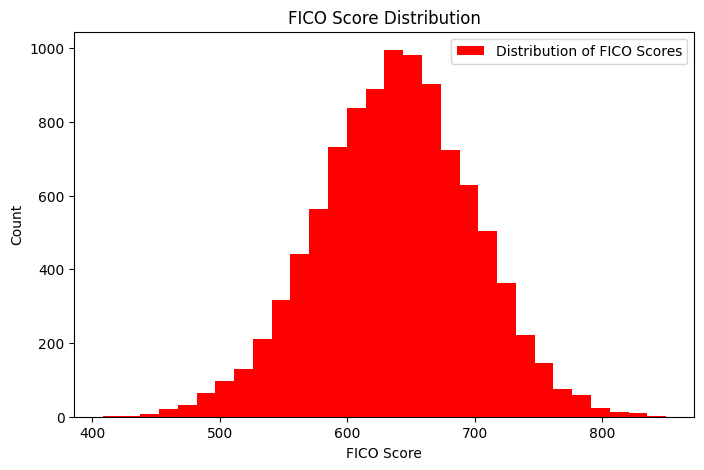

In [25]:
plt.figure(figsize=(8,5))
plt.hist(df["fico_score"], bins=30, color="Red", label="Distribution of FICO Scores")
plt.xlabel("FICO Score")
plt.ylabel("Count")
plt.title("FICO Score Distribution")
plt.legend()
plt.show()


In [19]:
pd_by_bucket = df.groupby("credit_rating")["default"].mean()
pd_by_bucket


,default
credit_rating,
0,0.055610
1,0.100050
2,0.154822
3,0.215260
4,0.405651


In [26]:
def map_fico_to_rating(fico_score):
    # Determine which bucket the score belongs to
    bucket = np.digitize([fico_score], bucket_edges)[0] - 1

    # Clip value to valid bucket range
    bucket = min(max(bucket, 0), num_buckets - 1)

    # Convert bucket → rating (lower = better)
    rating = (num_buckets - 1) - bucket

    return rating


In [27]:
print("FICO 820 → Rating:", map_fico_to_rating(820))
print("FICO 700 → Rating:", map_fico_to_rating(700))
print("FICO 590 → Rating:", map_fico_to_rating(590))


FICO 820 → Rating: 0
FICO 700 → Rating: 0
FICO 590 → Rating: 3
